LetsGrowMore #FEB2022

Author - Gaurang Bhandare

Task-2: Exploratory Data Analysis on Dataset - Terrorism

Level : INTERMEDIATE

Language- Python

Software- Google Colaboratory

Dataset-:https://bit.ly/2TK5Xn5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [ ]:
gtr = pd.read_csv("globalterrorism.csv",encoding='latin1')
gtr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
gtr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
gtr.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [ ]:
gtr = gtr[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [ ]:
gtr.head() # Shows the first five rows of the data 

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
gtr.shape # Shows the shape of the data variable in tuple format

(11960, 18)

In [ ]:
gtr.isnull().sum() # Checks whether the dataset contains any null value or not 

Year              0
Month             0
day               0
Country           0
State            42
Region            0
City              0
latitude        390
longitude       390
Attacktype        0
kill           1535
Wound          2865
target1         118
summary       11072
Group             1
Targettype        0
Weapon            1
motive        11337
dtype: int64

In [ ]:
gtr['Wound'] = gtr['Wound'].fillna(0)
gtr['kill'] = gtr['kill'].fillna(0)

In [ ]:
gtr['Casualities'] = gtr['kill'] + gtr['Wound']

In [ ]:
gtr.isnull().sum()

Year               0
Month              0
day                0
Country            0
State             42
Region             0
City               0
latitude         390
longitude        390
Attacktype         0
kill               0
Wound              0
target1          118
summary        11072
Group              1
Targettype         0
Weapon             1
motive         11337
Casualities        0
dtype: int64

# **Dropping the Columns**

In [ ]:
gtr.drop(['motive','summary','latitude','longitude'],axis=1,inplace=True)

In [ ]:
gtr.info() # Shows the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11960 non-null  int64  
 1   Month        11960 non-null  int64  
 2   day          11960 non-null  int64  
 3   Country      11960 non-null  object 
 4   State        11918 non-null  object 
 5   Region       11960 non-null  object 
 6   City         11960 non-null  object 
 7   Attacktype   11960 non-null  object 
 8   kill         11960 non-null  float64
 9   Wound        11960 non-null  float64
 10  target1      11842 non-null  object 
 11  Group        11959 non-null  object 
 12  Targettype   11960 non-null  object 
 13  Weapon       11959 non-null  object 
 14  Casualities  11960 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.4+ MB


In [ ]:
gtr.describe() 
# Shows the Statistical information like Count, Mean, Standard deviation, Minimum value, Quartile

,Year,Month,day,kill,Wound,Casualities
count,62732.000000,62732.000000,62732.000000,62732.000000,62732.000000,62732.000000
mean,1986.110518,6.382548,15.383728,1.881767,1.731923,3.613690
std,6.114117,3.397367,8.797779,9.229570,25.051870,27.465773
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,3.000000,8.000000,0.000000,0.000000,0.000000
50%,1987.000000,6.000000,15.000000,0.000000,0.000000,0.000000
75%,1991.000000,9.000000,23.000000,1.000000,0.000000,2.000000
max,1996.000000,12.000000,31.000000,1180.000000,5500.000000,5513.000000


**Data Visualization**

In [ ]:
attack = gtr.Country.value_counts()[:5]
attack

Peru              5936
El Salvador       5312
Colombia          5107
United Kingdom    3936
Spain             2639
Name: Country, dtype: int64

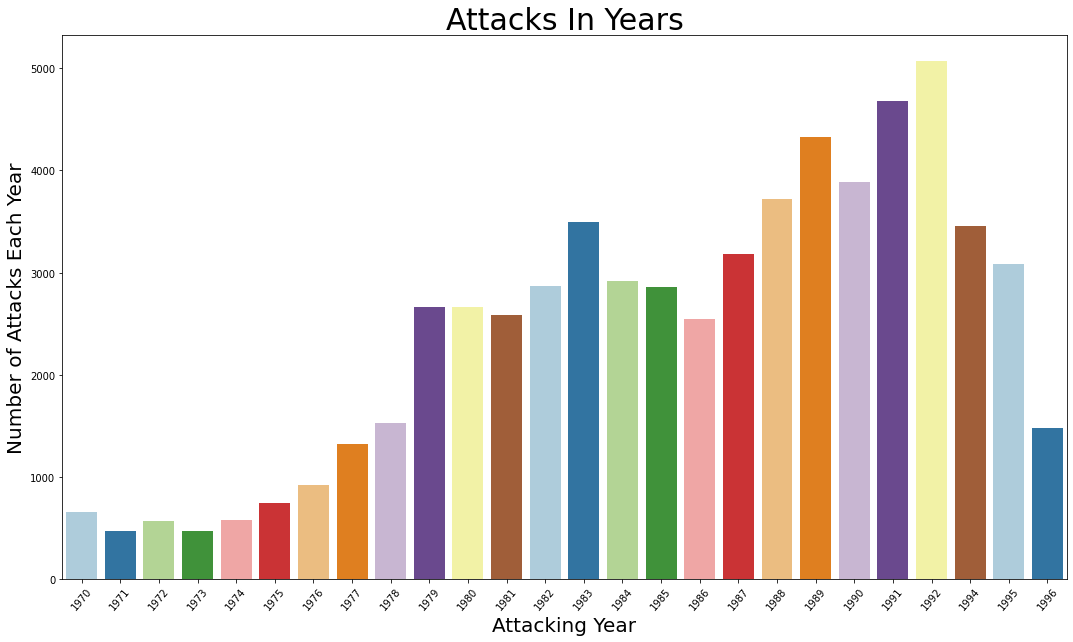

In [ ]:
year = gtr['Year'].unique()
years_count = gtr['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "Paired")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

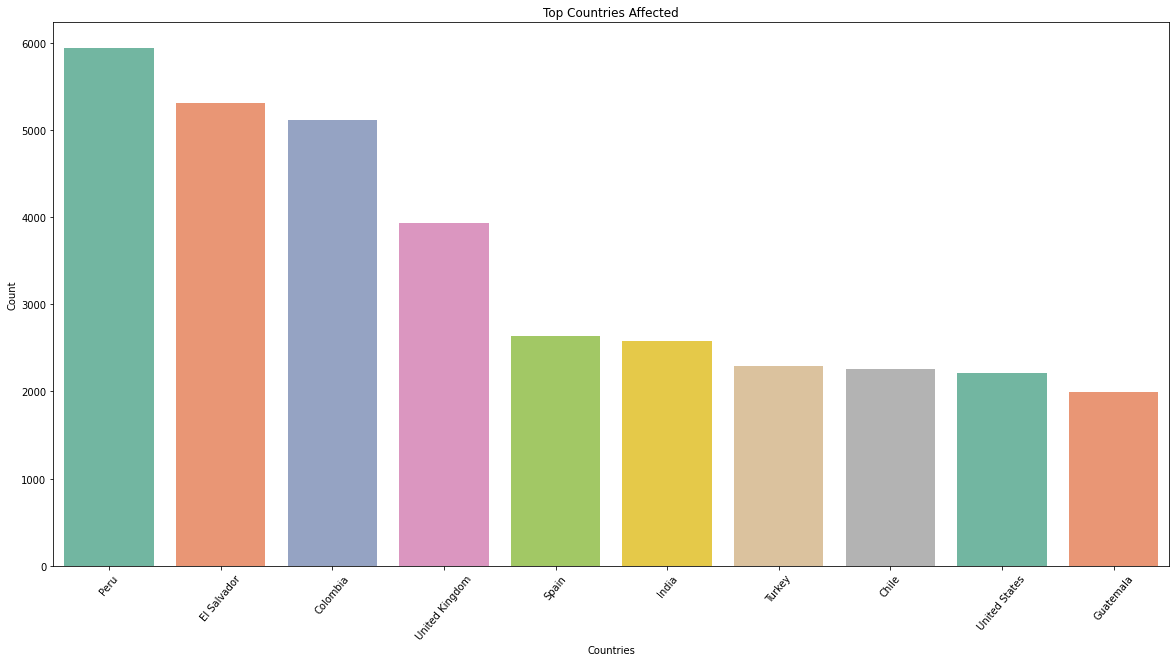

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(gtr['Country'].value_counts()[:10].index,gtr['Country'].value_counts()[:10].values,palette="Set2")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

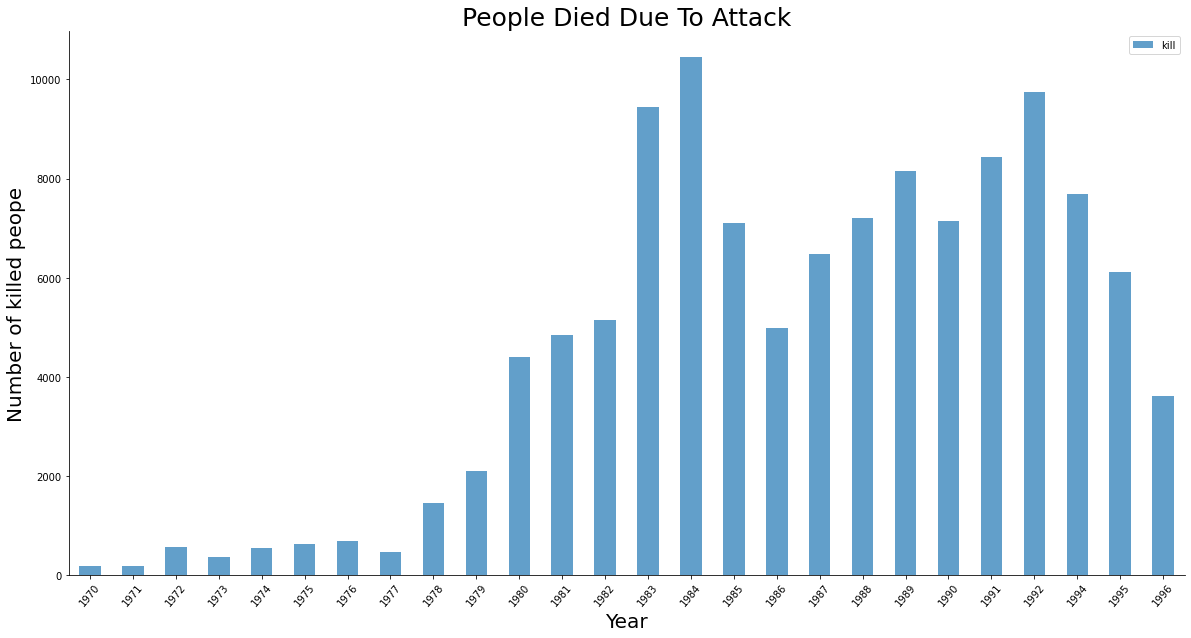

In [ ]:
df = gtr[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

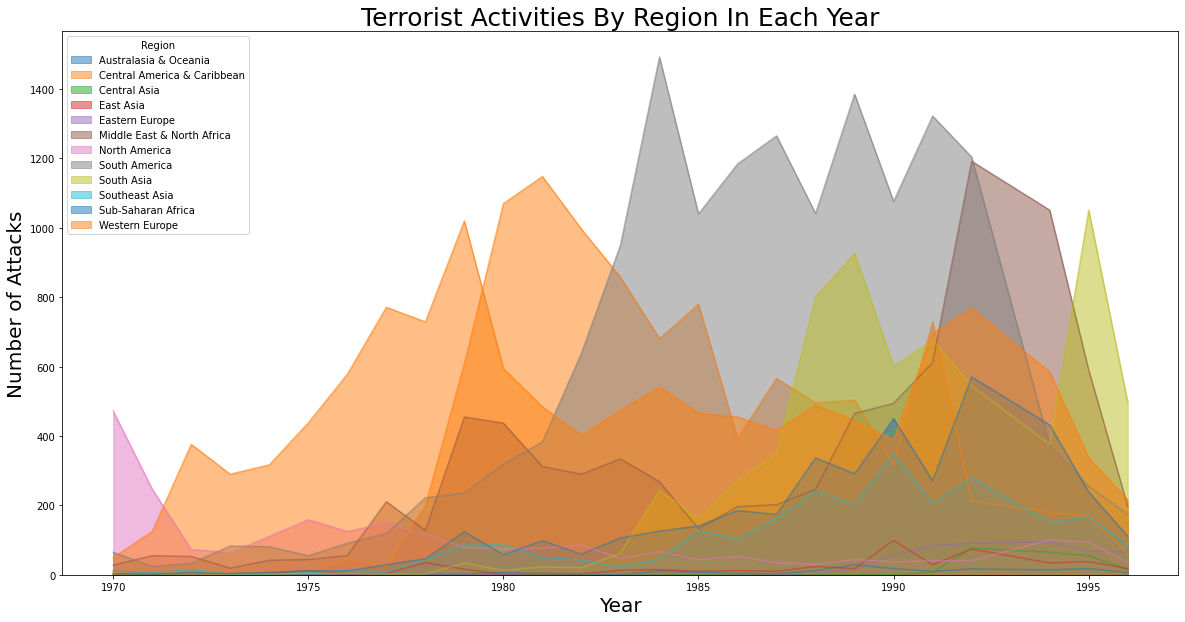

In [ ]:
pd.crosstab(gtr.Year, gtr.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

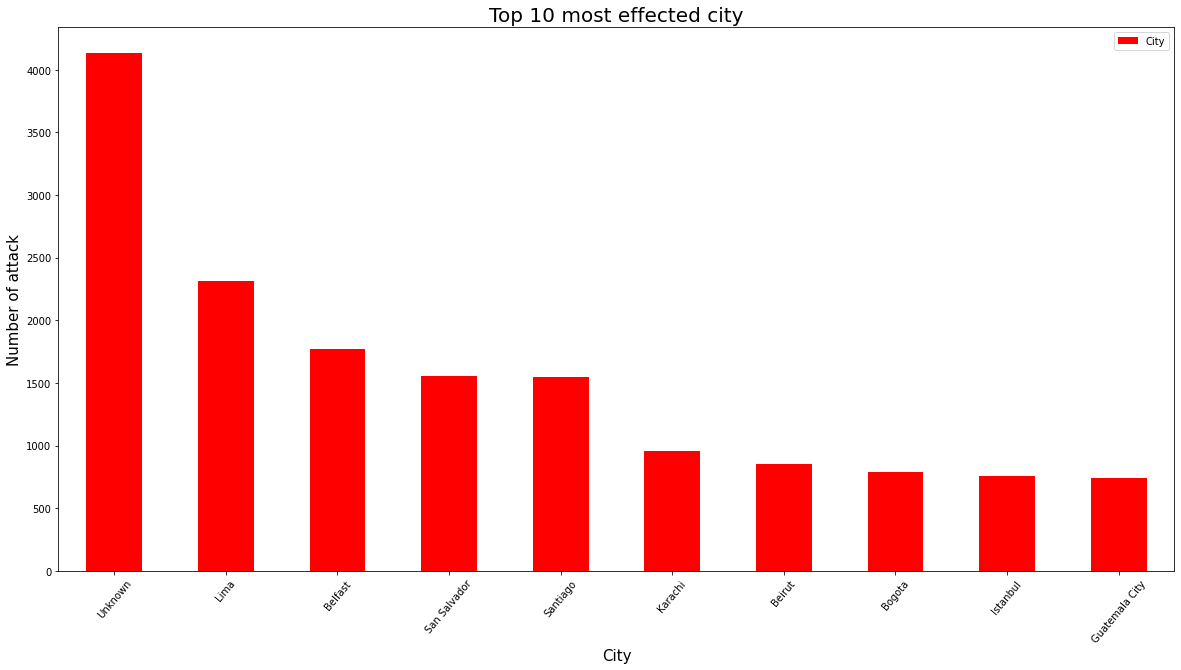

In [ ]:
gtr['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color="Red")
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

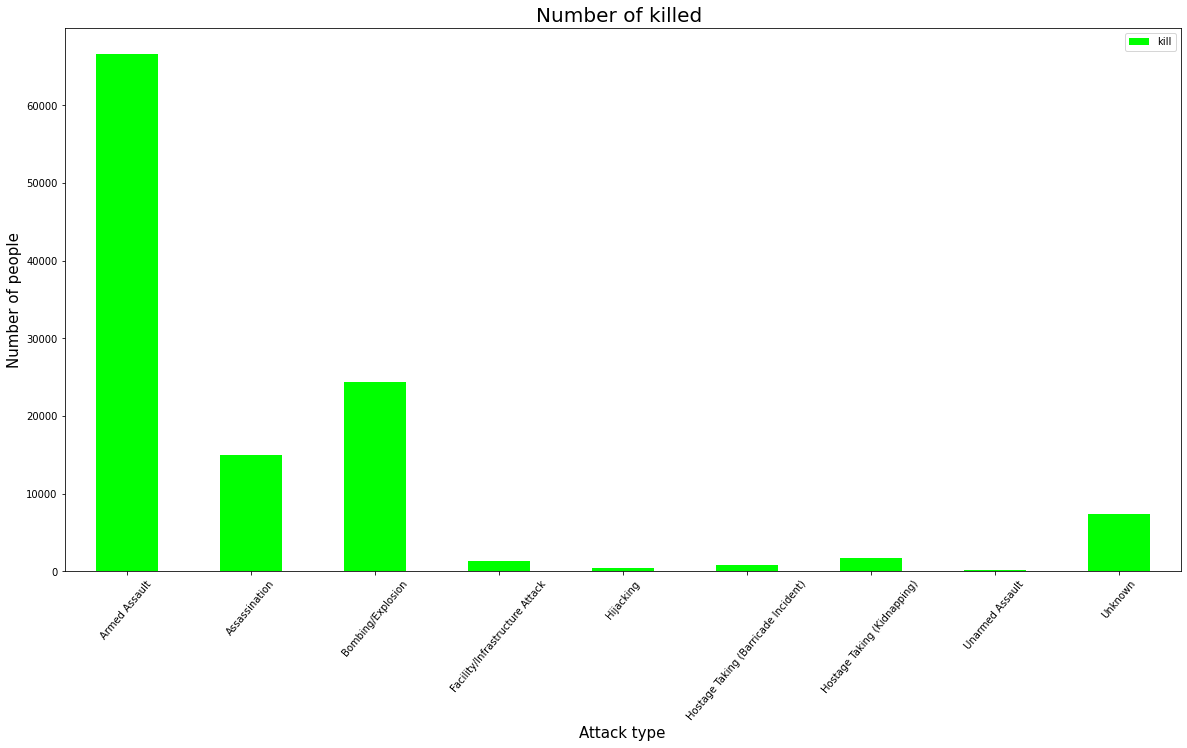

In [ ]:
gtr[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color="Lime")
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

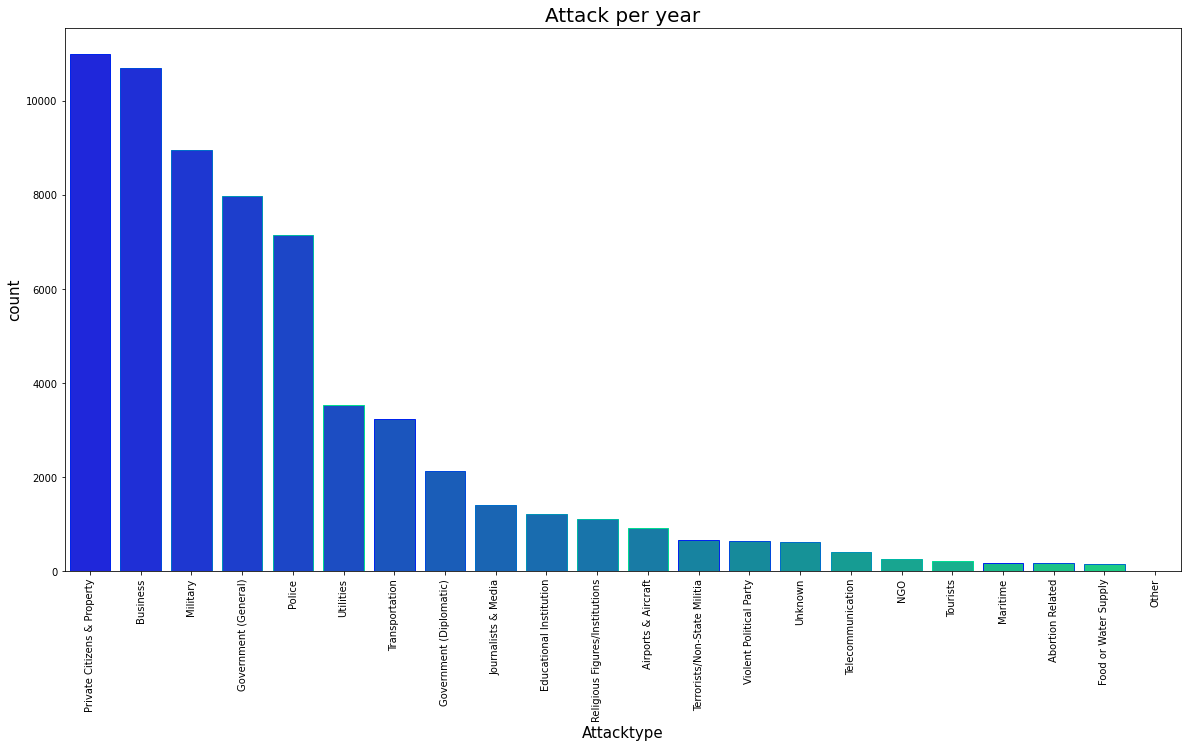

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(gtr["Targettype"],order=gtr['Targettype'].value_counts().index,palette="winter",edgecolor=sns.color_palette("winter"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

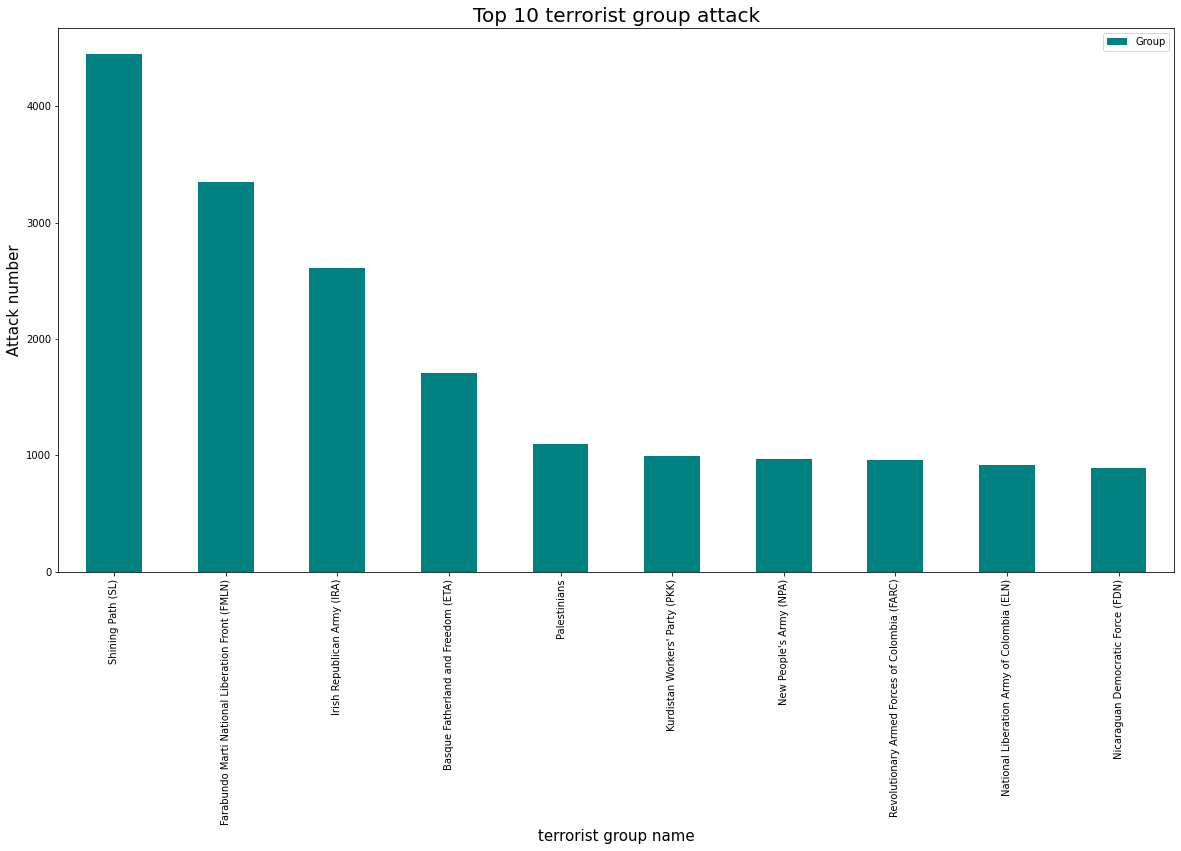

In [ ]:
gtr['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='Teal',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [ ]:
gtr=gtr[['Group','Country','kill']]
gtr=gtr.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
gtr

,Group,Country,kill
0,Shining Path (SL),Peru,11399.0
1,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
2,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,7047.0
3,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
4,Kurdistan Workers' Party (PKK),Turkey,3138.0
5,New People's Army (NPA),Philippines,3006.0
6,Revolutionary Armed Forces of Colombia (FARC),Colombia,2904.0
7,Sikh Extremists,India,2476.0
8,Mozambique National Resistance Movement (MNR),Mozambique,2357.0
9,Democratic Revolutionary Alliance (ARDE),Nicaragua,1803.0


# **Conclusion:**

Iraq is the country that has been targeted the most.

Baghdad, Iraq's capital, is the most often targeted city.

The majority of assaults occurred in 2014.

The Middle East and North Africa are the regions having the most assaults.

The Taliban is the outfit that has carried out the most assaults.